# Estación Casa de Campo

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 5]

import warnings
warnings.filterwarnings('ignore')

In [2]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from itertools import product

In [3]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from tqdm import tqdm

In [4]:
df = pd.read_csv("../../data/df_24.csv", index_col=0)
df.index = pd.to_datetime(df.index)

In [5]:
df.head()

,NO2
month,
2013-01-01,24.903226
2013-02-01,18.741935
2013-03-01,13.483871
2013-04-01,12.161290
2013-05-01,11.516129


### Estacionalidad

In [6]:
df2 = df.copy()

In [7]:
df2["año"] = df.index.year
df2["mes"] = df.index.month

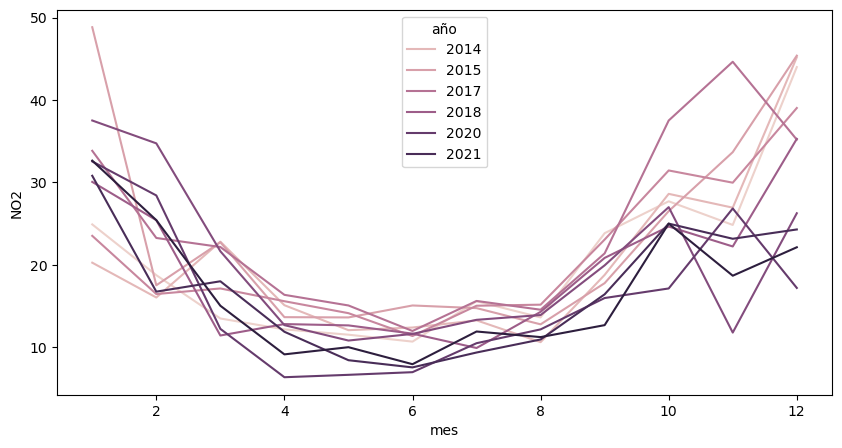

In [8]:
sns.lineplot(x = "mes", y = "NO2", hue = "año", data = df2);

### Estacionaridad

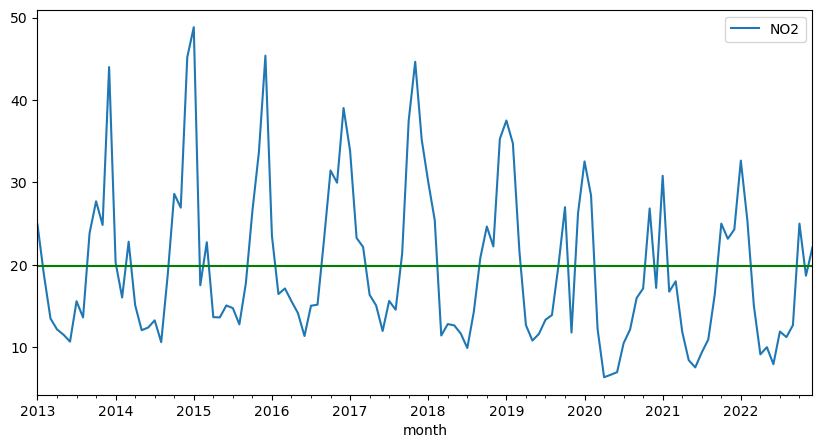

In [9]:
df.plot()
plt.axhline(df.NO2.mean(), c = "g");

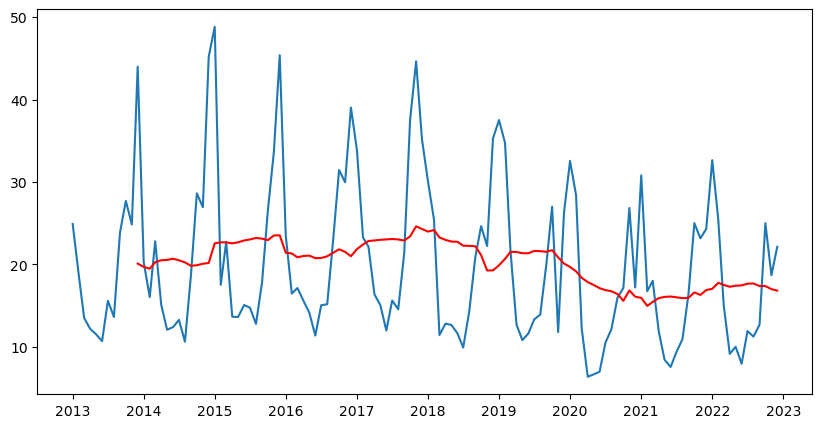

In [10]:
plt.plot(df["NO2"])
plt.plot(df.rolling(window= 12).mean(), c = "r");

In [11]:
df.head()

,NO2
month,
2013-01-01,24.903226
2013-02-01,18.741935
2013-03-01,13.483871
2013-04-01,12.161290
2013-05-01,11.516129


In [12]:
df2.head()

,NO2,año,mes
month,,,
2013-01-01,24.903226,2013,1
2013-02-01,18.741935,2013,2
2013-03-01,13.483871,2013,3
2013-04-01,12.161290,2013,4
2013-05-01,11.516129,2013,5


In [13]:
df3 = df.copy()

In [14]:
df3["year"] = df3.index.year
df3["month"] = df2.index.month
df3.head()

,NO2,year,month
month,,,
2013-01-01,24.903226,2013,1
2013-02-01,18.741935,2013,2
2013-03-01,13.483871,2013,3
2013-04-01,12.161290,2013,4
2013-05-01,11.516129,2013,5


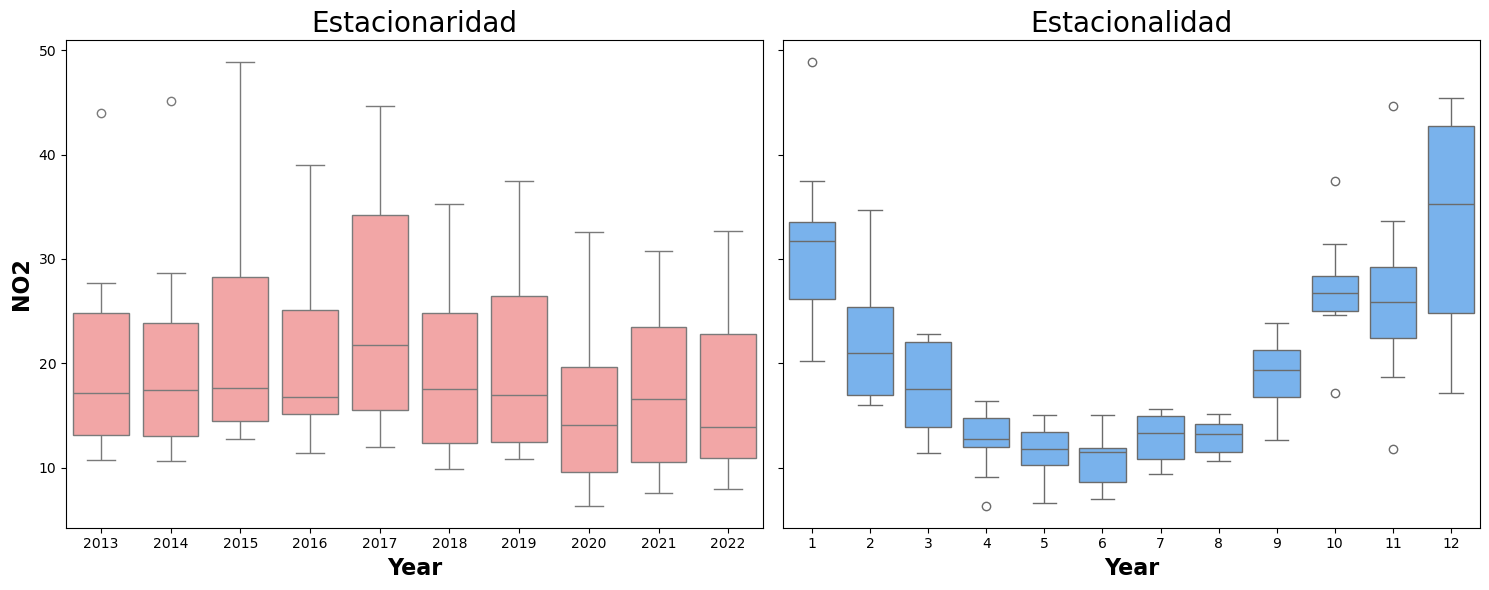

In [15]:
# Nos creamos una lista con las columnas de tiempo
tiempo = df3.columns.drop("NO2")

# Iniciamos los subplots
fig, ax = plt.subplots(nrows=1, ncols=len(tiempo), figsize=(15, 6), sharey=True)

# Nombres personalizados para los títulos
nombres = ["Estacionaridad", "Estacionalidad"]

# Colores bonitos para los boxplots
colores = ["#FF9999", "#66B2FF"]  # Puedes modificar estos códigos de colores

# Hacemos un loop para crear los boxplots para cada año
for i, col in enumerate(tiempo):
    sns.boxplot(data=df3, x=col, y="NO2", ax=ax[i], palette=[colores[i]])
    ax[i].set_title(nombres[i], fontsize=20, loc='center')
    ax[i].set_xlabel('Year', fontsize=16, fontdict=dict(weight='bold'))
    ax[i].set_ylabel('NO2', fontsize=16, fontdict=dict(weight='bold'))

plt.tight_layout()
plt.show()

No hay estacionaridad.

El de estacionalidad estudia todos los eneros, febreros,... de mis años muestra.

La aplicación de la estacionalidad (por ejemplo, a través de un modelo SARIMA con un parámetro estacional) sigue siendo relevante para comprender los patrones recurrentes en tus datos a lo largo del tiempo. Sin embargo, los desplazamientos o irregularidades en la mediana podrían indicar:

Cambios en los patrones estacionales: Las variaciones en la mediana podrían señalar cambios en los patrones estacionales a lo largo del tiempo. Esto puede requerir una exploración adicional para comprender si estas variaciones son anómalas o representan cambios genuinos en la estacionalidad.

Anomalías o eventos atípicos: La presencia de valores atípicos o eventos inusuales en los datos estacionales puede afectar la representación visual de la estacionalidad. Estos eventos pueden causar que la mediana no esté centrada en el boxplot.

En resumen, aunque la mediana desplazada en un boxplot puede indicar cierta variabilidad o cambios en los patrones estacionales, aún puedes aplicar el análisis estacional para comprender los ciclos recurrentes en tus datos. Sin embargo, es importante considerar las posibles anomalías o cambios en los datos que podrían estar afectando la representación visual de la estacionalidad.

### Test de Fuller

In [16]:
res = adfuller(df["NO2"])
res

(-1.0149599281596517,
 0.7477689811071593,
 11,
 108,
 {'1%': -3.4924012594942333,
  '5%': -2.8886968193364835,
  '10%': -2.5812552709190673},
 680.8613137691136)

In [17]:
print("AD Fuller Stats", res[0])
print("p-value", res[1])
print("Critical values")

for k, v in res[4].items():
    print(k, round(v, 2))

AD Fuller Stats -1.0149599281596517
p-value 0.7477689811071593
Critical values
1% -3.49
5% -2.89
10% -2.58


*Datos no estacionarios. Su media y su varianza están en función del tiempo 🍋*

### Autocorrelación

In [18]:
for i in range(49):
    print(f"{i} mes Lag, {df['NO2'].autocorr(lag= i)}")

0 mes Lag, 0.9999999999999998
1 mes Lag, 0.6464099576362098
2 mes Lag, 0.34204572050515836
3 mes Lag, 0.046362577769077595
4 mes Lag, -0.28173543276885016
5 mes Lag, -0.4719926322481234
6 mes Lag, -0.5388291380846654
7 mes Lag, -0.4937825585589952
8 mes Lag, -0.32638637670770276
9 mes Lag, -0.004059174652441465
10 mes Lag, 0.307924030825639
11 mes Lag, 0.5742965321792827
12 mes Lag, 0.7558787940926581
13 mes Lag, 0.6489967091937813
14 mes Lag, 0.3489946758457622
15 mes Lag, 0.08258772283075996
16 mes Lag, -0.2539029384727657
17 mes Lag, -0.4847967943849544
18 mes Lag, -0.5600857771170589
19 mes Lag, -0.5205835296870598
20 mes Lag, -0.33142630548007457
21 mes Lag, -0.027889617739022463
22 mes Lag, 0.24014169864184434
23 mes Lag, 0.5646643661669433
24 mes Lag, 0.7379349850735751
25 mes Lag, 0.611603256260941
26 mes Lag, 0.3618945657265135
27 mes Lag, 0.052603959503980675
28 mes Lag, -0.2904559920938298
29 mes Lag, -0.5182968271192762
30 mes Lag, -0.6280392943340735
31 mes Lag, -0.5585086

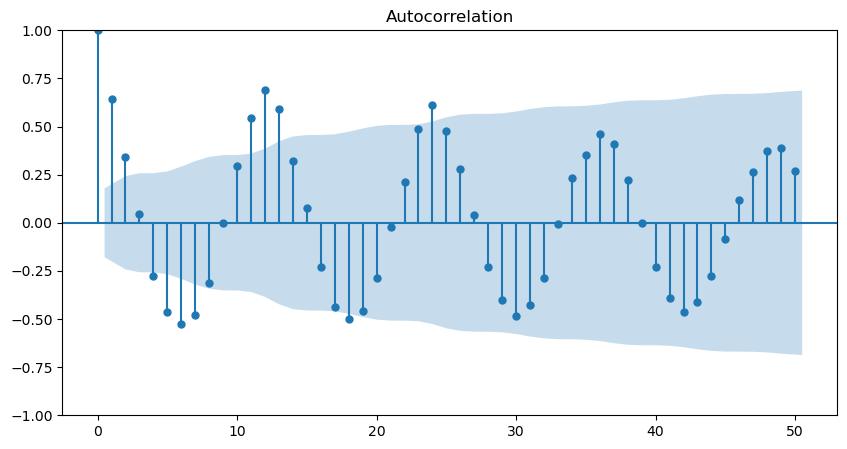

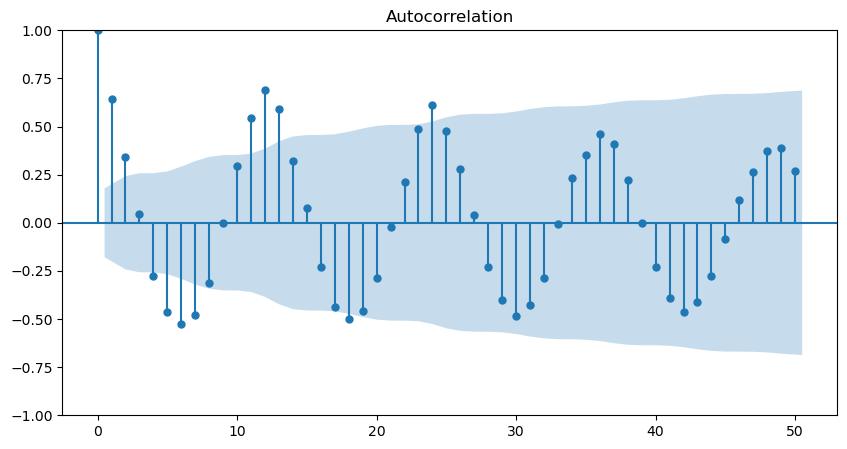

In [19]:
plot_acf(df, lags = 50)

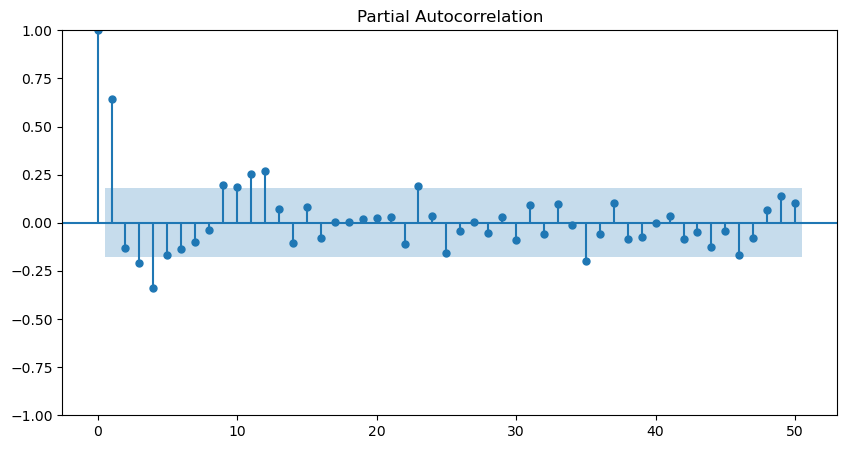

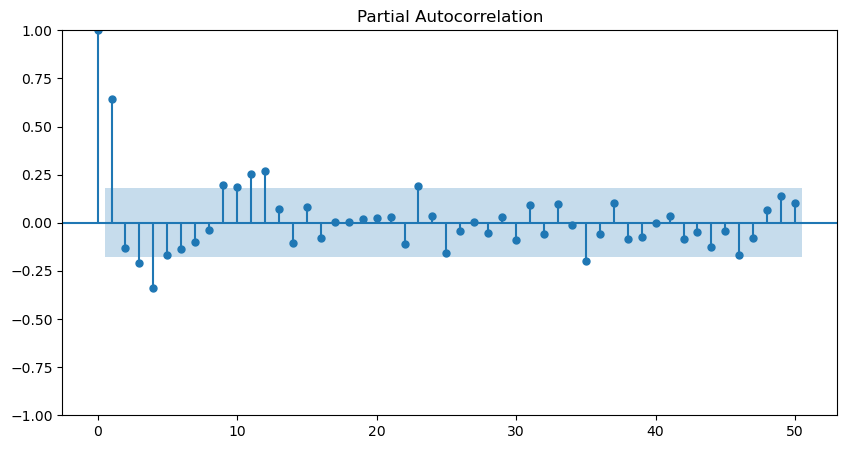

In [20]:
plot_pacf(df, lags = 50)

In [21]:
df.head()

,NO2
month,
2013-01-01,24.903226
2013-02-01,18.741935
2013-03-01,13.483871
2013-04-01,12.161290
2013-05-01,11.516129


In [22]:
df.shape

(120, 1)

In [23]:
df.isnull().sum()

NO2    0
dtype: int64

### SARIMA

In [24]:
y_test = df["NO2"][-30:]
y_train = df["NO2"][:-30]

In [25]:
ps = range(4)
ds = range(1,3)
qs = range(3)

parameters = list(product(ps,ds, qs))
print(parameters)

[(0, 1, 0), (0, 1, 1), (0, 1, 2), (0, 2, 0), (0, 2, 1), (0, 2, 2), (1, 1, 0), (1, 1, 1), (1, 1, 2), (1, 2, 0), (1, 2, 1), (1, 2, 2), (2, 1, 0), (2, 1, 1), (2, 1, 2), (2, 2, 0), (2, 2, 1), (2, 2, 2), (3, 1, 0), (3, 1, 1), (3, 1, 2), (3, 2, 0), (3, 2, 1), (3, 2, 2)]


In [26]:
%%time
rmse = []
order = []
for p, d, q in tqdm(parameters):
    try:
        modelo=ARIMA(y_train, order=(p, d, q)).fit()
        pred = modelo.predict(start=len(y_train), end=len(df) -1)
        error = np.sqrt(np.mean(mean_squared_error(y_test, pred)))
        rmse.append(error)
        order.append((p,d, q))
    except: 
        continue

  0%|          | 0/24 [00:00<?, ?it/s]C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_

 62%|██████▎   | 15/24 [00:00<00:00, 26.33it/s]C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\

CPU times: total: 734 ms
Wall time: 1.1 s


In [27]:
# veamos los resultados de todos los modelos
results = pd.DataFrame({"RMSE": rmse, "order": order})
results.sort_values(by="RMSE", inplace=True)
results.head()

,RMSE,order
14,7.571899,"(2, 1, 2)"
8,7.661615,"(1, 1, 2)"
20,7.672958,"(3, 1, 2)"
3,8.916939,"(0, 2, 0)"
9,8.980743,"(1, 2, 0)"


In [28]:
%%time

modelo=SARIMAX(endog=y_train, 
               exog=None,
               #order=(2, 1, 2),  # modelo arima
               seasonal_order=(2, 1, 2, 12) # modelo sarima, estacionalidad es el último valor
              ).fit(disp=False)
                     
pred=modelo.predict(len(y_train), len(df)-1)  

error=(pred-y_test).abs().sum()/len(pred) 
print ('Error mae: ', error)


res=pd.DataFrame({'real':y_test, 'pred':pred, 'error':pred-y_test})
res

C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Error mae:  3.9276361544990532
CPU times: total: 484 ms
Wall time: 604 ms


,real,pred,error
2020-07-01,10.483871,11.029956,0.546085
2020-08-01,12.161290,13.431493,1.270203
2020-09-01,15.967742,20.474324,4.506582
2020-10-01,17.129032,26.439603,9.310571
2020-11-01,26.838710,19.065099,-7.773611
2020-12-01,17.193548,33.189257,15.995709
2021-01-01,30.806452,33.262799,2.456347
2021-02-01,16.741935,28.280235,11.538299
2021-03-01,18.000000,17.114369,-0.885631
2021-04-01,11.870968,10.451257,-1.419711


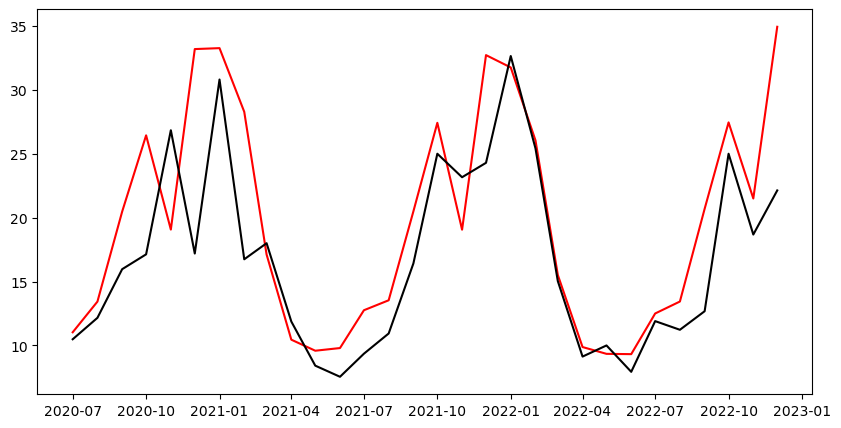

In [29]:
plt.plot(res["pred"], c = "r")
plt.plot(res["real"], c = "black");

In [30]:
pred["real_test"] = y_test

In [31]:
pred_año = pd.DataFrame(modelo.predict(start = len(df), end = len(df) + 9))
pred_año

,predicted_mean
2023-01-01,31.655343
2023-02-01,25.503838
2023-03-01,16.796378
2023-04-01,11.118971
2023-05-01,10.273487
2023-06-01,10.160652
2023-07-01,13.022158
2023-08-01,13.449582
2023-09-01,20.740848
2023-10-01,27.786540


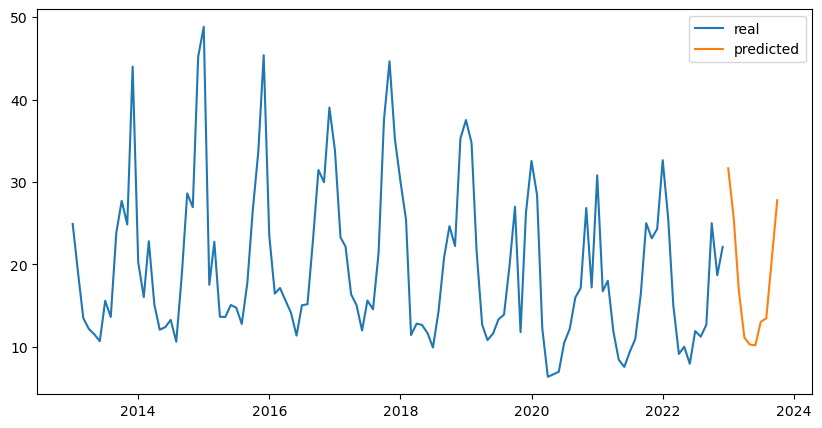

In [32]:
plt.plot(df)
plt.plot(pred_año)
plt.legend(["real", "predicted"]);

In [33]:
pred_año

,predicted_mean
2023-01-01,31.655343
2023-02-01,25.503838
2023-03-01,16.796378
2023-04-01,11.118971
2023-05-01,10.273487
2023-06-01,10.160652
2023-07-01,13.022158
2023-08-01,13.449582
2023-09-01,20.740848
2023-10-01,27.786540


## Datos reales 2023

In [34]:
df23 = pd.read_csv("../../data/emisiones23.csv")

In [35]:
df23.head()

,Unnamed: 0,ESTACION,ANO,MES,NO2
0,0,4,2023,1,32.516129
1,1,4,2023,2,36.741935
2,2,4,2023,3,27.806452
3,3,4,2023,4,22.838710
4,4,4,2023,5,16.612903


### Elijo la estación correspondiente

In [36]:
df_24_23 = df23[df23["ESTACION"] == 24]
df_24_23

,Unnamed: 0,ESTACION,ANO,MES,NO2
59,59,24,2023,1,20.935484
60,60,24,2023,2,20.838710
61,61,24,2023,3,15.451613
62,62,24,2023,4,11.451613
63,63,24,2023,5,9.451613
64,64,24,2023,6,11.064516
65,65,24,2023,7,10.032258
66,66,24,2023,8,10.161290
67,67,24,2023,9,17.096774
68,68,24,2023,10,17.419355


In [37]:
import sys
sys.path.append('../../src')

from clean_support import NO2_clean, estacion_timeseries

In [38]:
estacion_timeseries(df_24_23)

,Unnamed: 0,NO2
month,,
2023-01-01,59,20.935484
2023-02-01,60,20.838710
2023-03-01,61,15.451613
2023-04-01,62,11.451613
2023-05-01,63,9.451613
2023-06-01,64,11.064516
2023-07-01,65,10.032258
2023-08-01,66,10.161290
2023-09-01,67,17.096774


In [39]:
df_24_23.drop("Unnamed: 0", axis=1, inplace=True)

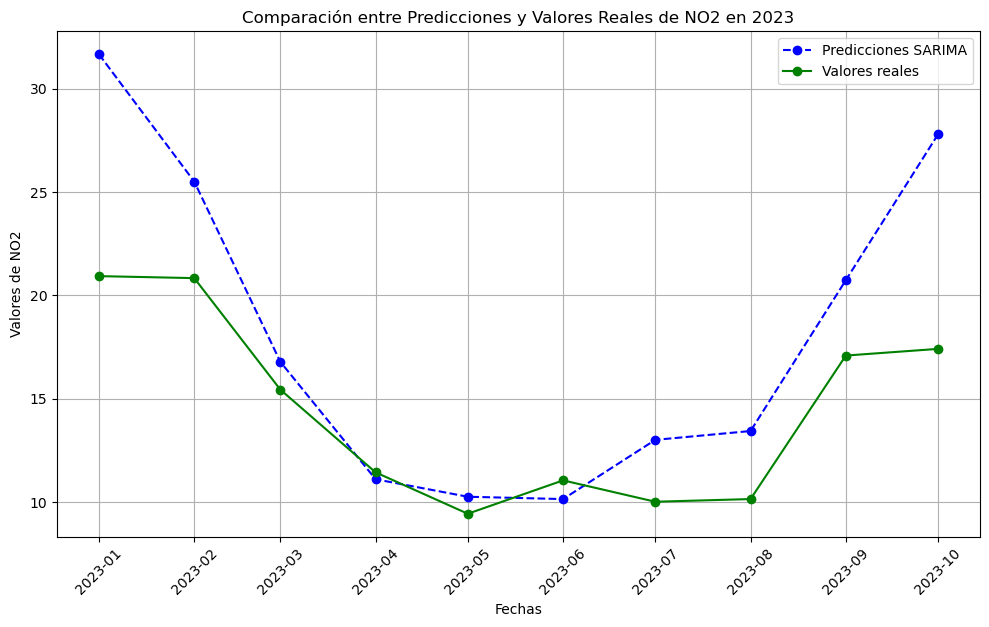

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

# Suponiendo que pred_año y df_08_23 son tus DataFrames con las predicciones y los valores reales respectivamente
# Asegúrate de tener las fechas como índices y las columnas 'predicted_mean' y 'NO2' disponibles

# Convertir las columnas de fechas a objetos datetime si es necesario
pred_año.index = pd.to_datetime(pred_año.index)
df_24_23.index = pd.to_datetime(df_24_23.index)

# Filtrar los datos de 2023 para enero a octubre
predicciones_2023 = pred_año['predicted_mean']['2023-01':'2023-10']
valores_reales_2023 = df_24_23['NO2']['2023-01':'2023-10']

# Crear la gráfica
plt.figure(figsize=(10, 6))
plt.plot(predicciones_2023.index, predicciones_2023, color='blue', label='Predicciones SARIMA', linestyle='--', marker='o')
plt.plot(valores_reales_2023.index, valores_reales_2023, color='green', label='Valores reales', linestyle='-', marker='o')

# Añadir etiquetas, título y leyenda
plt.xlabel('Fechas')
plt.ylabel('Valores de NO2')
plt.title('Comparación entre Predicciones y Valores Reales de NO2 en 2023')
plt.legend()

# Mejorar el diseño
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)  # Rotar las fechas para mayor legibilidad

# Mostrar la gráfica
plt.show()

In [41]:
pred_año["predicted_mean"]
df_24_23["NO2"]

month
2023-01-01    20.935484
2023-02-01    20.838710
2023-03-01    15.451613
2023-04-01    11.451613
2023-05-01     9.451613
2023-06-01    11.064516
2023-07-01    10.032258
2023-08-01    10.161290
2023-09-01    17.096774
2023-10-01    17.419355
Freq: MS, Name: NO2, dtype: float64

### Estimación cierre 2023

In [42]:
pred_año_total = pd.DataFrame(modelo.predict(start = len(df), end = len(df) + 11))
pred_año_total

,predicted_mean
2023-01-01,31.655343
2023-02-01,25.503838
2023-03-01,16.796378
2023-04-01,11.118971
2023-05-01,10.273487
2023-06-01,10.160652
2023-07-01,13.022158
2023-08-01,13.449582
2023-09-01,20.740848
2023-10-01,27.786540


In [43]:
# Obtener las dos últimas filas de pred_año_total
ultimas_filas_pred_año = pred_año_total.tail(2)

# Renombrar la columna 'predicted_mean' como 'NO2' en las dos últimas filas
ultimas_filas_pred_año = ultimas_filas_pred_año.rename(columns={'predicted_mean': 'NO2'})

# Añadir las dos últimas filas al final de df_17_23 preservando el índice de fechas
frames = [df_24_23, ultimas_filas_pred_año]
df_extendido = pd.concat(frames)

# Verificar el DataFrame extendido
df_extendido

,NO2
2023-01-01,20.935484
2023-02-01,20.838710
2023-03-01,15.451613
2023-04-01,11.451613
2023-05-01,9.451613
2023-06-01,11.064516
2023-07-01,10.032258
2023-08-01,10.161290
2023-09-01,17.096774
2023-10-01,17.419355


In [44]:
df_predict23 = df_extendido.mean()
df_predict23

NO2    16.766982
dtype: float64

In [46]:
dff = df_predict23.to_frame()
dff = dff.rename(columns={0: "Casa de Campo"})
dff

,Casa de Campo
NO2,16.766982


In [47]:
dff.to_csv('../../clean_visuals/predicts23/24_Casa_de_Campo.csv', index=True)